# Lecture du fichier de donnes

In [20]:
# importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# On a remplacer from pandas_profiling par from ydata_profiling
from ydata_profiling import ProfileReport
from datetime import datetime

In [191]:
# Lecture du fichier de données

data = pd.read_csv('Files/mouvements_comptables.txt', sep='|')

In [136]:
# Affichage des 5 premières lignes

data

,numero_compte,lib_etendu,bilan,dt_val,dt_ope,montant_signe,signe,extourne,cpt_anal,dt_tresor,dt_compta,type_compta,num_oper,cd_user,cd_visa,time
0,ebd12c14b29d5e3c9c0785ea41787292,41ce64b36b9cfe92670dcdfa7ad4ca9b,21110,2022-01-28,2022-02-01,-99.00,-,1.0,NaN,2022-02-01,2022-02-01,C,405834e2defca25e09dc43bb35baa8a9,NaN,NaN,2022-02-02 00:00:00.0
1,ebd12c14b29d5e3c9c0785ea41787292,fdbb71769ecf00d5778f657271bc9d9b,21110,2022-01-31,2022-02-01,-200.00,-,NaN,NaN,NaN,2022-02-01,NaN,6c9af0676f860469c7c1789f13c33bbf,NaN,NaN,2022-02-02 00:00:00.0
2,ebd12c14b29d5e3c9c0785ea41787292,ce2bf864bfcd82b4bf01120c79d7ba46,21110,2022-02-02,2022-02-01,1900.00,+,1.0,NaN,2022-02-01,2022-02-01,C,NaN,NaN,NaN,2022-02-02 00:00:00.0
3,b9a371e2aa5b4a9a9801b639896db549,1fd98623f4623649bac0dd8c65ec49ce,21110,2022-01-28,2022-02-01,-1000.00,-,1.0,NaN,NaN,2022-02-01,C,514a4b4d706abd42b192b9fa761894b6,NaN,NaN,2022-02-02 00:00:00.0
4,a45c978dca989f17c7c8bb2cada9514f,234f3006bad9b99df4e4d08556484dc9,21110,2022-01-28,2022-02-01,-2700.00,-,1.0,NaN,NaN,2022-02-01,C,ee3965f79a51f6aa2c2e6821fde47b99,NaN,NaN,2022-02-02 00:00:00.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4a1090564b3eed9ff5e5a9a7a52c9fb3,8f2c23b5908d3bfddefbaa884fa763e2,21110,2022-02-02,2022-02-01,1200.00,+,1.0,NaN,2022-02-01,2022-02-01,C,adcdee0ac15d2b3b509cb18d57c99d92,1ea352c2bd519e32e5ccf69e49898ca1,NaN,2022-02-02 00:00:00.0
9996,1cd6be87bc855d719772244fa5aad246,f63c78b6318dce39f42161d6c56df3e5,21110,2022-01-31,2022-02-01,-1488.79,-,NaN,NaN,NaN,2022-02-01,NaN,5a25b295f0f7dc47457d19ae946232f5,NaN,NaN,2022-02-02 00:00:00.0
9997,bedc8bdd747462239d11a60ba50eb53a,f63c78b6318dce39f42161d6c56df3e5,21110,2022-01-31,2022-02-01,-1028.91,-,NaN,NaN,NaN,2022-02-01,NaN,7bcd21d8f87695b09b5615f4d7aeaa73,NaN,NaN,2022-02-02 00:00:00.0
9998,555d348f6417f55053523c4813c29e9f,cde473b0517a59e56d77ec3f7d7fe449,21110,2022-01-28,2022-02-01,-400.00,-,1.0,NaN,NaN,2022-02-01,C,3d1961e8a49379a7b0b761f8d396b5c5,NaN,NaN,2022-02-02 00:00:00.0


# On va commencer l'exploration des donnees

In [6]:
# On va utiliser pandas_profiling pour avoir un aperçu des données

profile = ProfileReport(data, title='Pandas Profiling Report', html={'style':{'full_width':True}})
# Enregistrer le rapport au format HTML
profile.to_file("Outputs/data_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Conclusion :
A l'issue de la premiere analyse du rapport, on a 10000 observations dans notre dataset et 16 colonnes.
Nous avons 13 colonnes de type ctegoriciel, 2 de type numerique et 1 de type unsupported (il s'agit de la colone cpt_anal qui ne contient que des valeurs nulles).
Nous avons egalement 35470 cellules vides et 50 lignes dupliquees dans notre dataset.
Nous avons egalement pu obtenir un apercu rapide de la disribution des colonnes de notre dataset.
On a egalement des variables qui sont tres corelles, entre autres dt_tresor, cd_user et cd_visa qui sont tres corelles, mais cela est seulement du au fait que ces variables ont enormement de valeurs nulles

In [67]:
data.describe()

,bilan,montant_signe,extourne,cpt_anal
count,10000.000000,9.999000e+03,8526.0,0.0
mean,25683.799900,-4.930480e+02,1.0,NaN
std,12702.380978,1.978045e+05,0.0,NaN
min,11110.000000,-4.689931e+06,1.0,NaN
25%,21110.000000,-1.505500e+03,1.0,NaN
50%,21110.000000,-9.000000e+01,1.0,NaN
75%,21210.000000,1.000000e+03,1.0,NaN
max,89490.000000,8.179528e+06,1.0,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   numero_compte  10000 non-null  object 
 1   lib_etendu     9999 non-null   object 
 2   bilan          10000 non-null  int64  
 3   dt_val         9986 non-null   object 
 4   dt_ope         9999 non-null   object 
 5   montant_signe  9999 non-null   float64
 6   signe          9999 non-null   object 
 7   extourne       8526 non-null   float64
 8   cpt_anal       0 non-null      float64
 9   dt_tresor      5521 non-null   object 
 10  dt_compta      9999 non-null   object 
 11  type_compta    8495 non-null   object 
 12  num_oper       8599 non-null   object 
 13  cd_user        2674 non-null   object 
 14  cd_visa        734 non-null    object 
 15  time           10000 non-null  object 
dtypes: float64(3), int64(1), object(12)
memory usage: 1.2+ MB


In [167]:
# On a 50 lignes dupliquees dans notre dataset. On va les supprimer

def drop_duplicates(data):
    data.drop_duplicates(inplace=True)
    return data

data = drop_duplicates(data)

In [5]:
# On va etudier la colonne numero de compte

data['numero_compte'].value_counts()

numero_compte
c507b3ee99facefc0aaa42e5b40fe9ab    129
77d1c7cdb8262110ad7ec1b24f56195f     77
021a9a2d47e6e317191634fb783ec9a3     63
bc05265db32bc80f81520b91c1f6545f     58
6f93a70908558a8abbec920dabc3e29b     57
                                   ... 
84dde6197ee045c32ba51e18bebcf5a4      1
0877d0e271727b5feea8bf56a914796a      1
5fa9d3f34e55e2182e984568fd592ec9      1
66bb2bc5a622f158be5f89291552117c      1
35c169d786f4ecbe7e4d72a09b64bb51      1
Name: count, Length: 5125, dtype: int64

On a 5125 numero de compte different dans notre dataset dont certains se repetent plusieurs fois.
On remarque egalement que les trabsacions sont groupes par numero de compte.

In [6]:
# On va etudier la colonne libelle

data['lib_etendu'].value_counts()

lib_etendu
f63c78b6318dce39f42161d6c56df3e5    551
fdbb71769ecf00d5778f657271bc9d9b    260
5f9d3ba91a169b3787845d22e2600c4a    196
a5bff291014832114aa89d40ee8be7e2    169
dc264c7cb3824c5a0ae86d0caa1042e1    139
                                   ... 
6878ea83474a018b7258489918021ceb      1
5e3e78d9a6263b25ff9eec3625b39eba      1
a0458a07b5bac49a85c65251adb9e5e8      1
17933eaa7a81a0a750223b41a6e46e5d      1
feb34656f4f2399b5eb36094f71ed0dd      1
Name: count, Length: 5271, dtype: int64

In [7]:
data.lib_etendu.isnull().sum()

1

In [8]:
# On va voir la ligne qui contient la valeur nulle
data[data.lib_etendu.isnull()]

,numero_compte,lib_etendu,bilan,dt_val,dt_ope,montant_signe,signe,extourne,cpt_anal,dt_tresor,dt_compta,type_compta,num_oper,cd_user,cd_visa,time
9199,5c01e4e913a1ba29ed1c2569e4373553,NaN,21110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-02 00:00:00.0


In [9]:
# Voyons le nombre de transactions effectuees par la personne qui a le numero de compte

data[data.numero_compte == '5c01e4e913a1ba29ed1c2569e4373553']

,numero_compte,lib_etendu,bilan,dt_val,dt_ope,montant_signe,signe,extourne,cpt_anal,dt_tresor,dt_compta,type_compta,num_oper,cd_user,cd_visa,time
9199,5c01e4e913a1ba29ed1c2569e4373553,NaN,21110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-02 00:00:00.0
9200,5c01e4e913a1ba29ed1c2569e4373553,9b168d19d3633aeff57ad22a0b79cbbf,21110,2022-02-01,2022-02-01,1049.00,+,1.0,NaN,2022-02-01,2022-02-01,C,8a3022ebea48b9cd08b6c6a4d75ea85a,NaN,NaN,2022-02-02 00:00:00.0
9201,5c01e4e913a1ba29ed1c2569e4373553,f63c78b6318dce39f42161d6c56df3e5,21110,2022-01-31,2022-02-01,-1470.22,-,NaN,NaN,NaN,2022-02-01,NaN,ef71a23f44ae162a64d68e77e2474198,NaN,NaN,2022-02-02 00:00:00.0


In [168]:
# On va remplacer le lib_etendu NAN par unknown var il n'y a aucune relation les autres libelles du meme compte

data['lib_etendu'].fillna('unknown', inplace=True)

In [12]:
# On va etudier la colonne bilan

data['bilan'].value_counts()

bilan
21110    5936
21210    1157
47110     538
21140     332
21310     310
         ... 
21433       1
89412       1
89490       1
21446       1
46113       1
Name: count, Length: 80, dtype: int64

In [13]:
# Nombre de valeurs nulles dans la colonne bilan

data.bilan.isnull().sum()

0

In [79]:
# On va s'interesser a la colonne dt_val

data['dt_val'].value_counts()

dt_val
2022-02-01    3147
2022-01-31    2432
2022-01-28    1845
2022-02-02    1732
2022-02-16      76
2022-01-27      59
2022-01-30      53
2022-01-29      36
2022-02-04      25
2022-01-01      10
2022-01-26       9
2022-01-17       7
2022-01-06       4
2022-02-03       4
2022-01-25       3
2021-12-16       2
2022-01-23       2
2022-02-15       1
2022-01-24       1
Name: count, dtype: int64

In [78]:
# nombre de valeurs manquantes dans la colonne dt_val
data.dt_val.isnull().sum()

0

Conclusion :
On remarque qu'on a quelques valeurs nulles dans la colonne dt_val, mais qu'on a aussi des dates dont la plage depasse celle autorisee qui va du 1er janvier 1978 au 31 decembre 2262. On va donc supprimer toutes les dates qui sont hors de ces limites par le 1er janvier 1978 mais aussi toutes les lignes ou la date est nulle.

In [169]:
# On va supprimer les lignes ou les dates sont nulles et dont l'annee n'est pas 1an avant, pendant et 1 an apres l'annee actuelle dans une colonne specifique

def drop_incorrect_dates(data, colonne):
    actual_year = 2022 #datetime.now().year

    # supprimer les lignes ou la date est nulle
    data = data[data[colonne].notnull()]

    # supprimer les lignes ou l'annee est differente de l'annee actuelle
    data = data[(pd.to_datetime(data[colonne], format='%Y-%m-%d', errors='coerce').dt.year == actual_year) | (pd.to_datetime(data[colonne], format='%Y-%m-%d', errors='coerce').dt.year == actual_year - 1) | (pd.to_datetime(data[colonne], format='%Y-%m-%d', errors='coerce').dt.year == actual_year + 1)]

    return data

data = drop_incorrect_dates(data, 'dt_val')

In [170]:
# On va creer un colonne qui represente la difference en nombre de jours entre la colonne dt_val et dt_ope

data['diff_ope_val'] = (pd.to_datetime(data['dt_ope'], format='%Y-%m-%d', errors='coerce') - pd.to_datetime(data['dt_val'], format='%Y-%m-%d', errors='coerce')).dt.days

In [161]:
data['diff_ope_val'].value_counts()

diff_ope_val
 0     3044
 1     2411
 4     1845
-1     1729
-15      76
 5       59
 2       53
 3       36
-3       25
 31      10
 6        9
 15       7
 26       4
-2        4
 7        3
 47       2
 9        2
-14       1
 8        1
Name: count, dtype: int64

In [171]:
# On va creer une variable diff_ope_val_signe qui represente le signe de la difference de jours entre dt_ope et dt_val. En effet le fait que la date soit negative signifie que la date de validation a eu lieu avant la date d'operation ce qui n'est pas logique et pourrait etre une erreur lors de l'enredistrement des donnees ou une fraude potentielle

data['diff_ope_val_signe'] = np.where(data['diff_ope_val'] < 0, '-', '+')

In [83]:
data['diff_ope_val_signe'].value_counts()

diff_ope_val_signe
+    7610
-    1838
Name: count, dtype: int64

In [88]:
# On va etudier la colonne dt_tresor

data['dt_tresor'].value_counts()

dt_tresor
2022-02-01    4914
2022-01-31      59
Name: count, dtype: int64

In [89]:
# Valeurs nulles dans la colonne dt_tresor

data.dt_tresor.isnull().sum()

4475

La colonne dt_tresor a trop de valeurs nulles et quasiment que des valeurs uniques, on va donc la supprimer

In [90]:
# On va etudier la colonne num_oper

data['num_oper'].value_counts()

num_oper
33b740d576137674827e2107defdabe5    80
4ea543c9c9d17d90acd60b58cf877ebf    66
6b9dc969c1826a6ac3b52b53aef6ac16    12
f9ef806ecad58a628a68d8363c6e4837    12
414ac732be573e116062657474189e1f    11
                                    ..
922349815331f125d593e08c3117cf0a     1
c3a8c504abf132d3201d85b04f190395     1
5893f3f825cdbb7fcb178a2e050ee708     1
155a066a60ddfac6b754bfc27c0b39d5     1
14723d8b9a77ae0816b4943aa30bc8fe     1
Name: count, Length: 7231, dtype: int64

In [91]:
# Nombre de valeures nulles dans la colonne num_oper

data.num_oper.isnull().sum()

1377

In [92]:
# On va remplacer les valeurs nulles dans la colonne num_oper par unknown.

data['num_oper'].fillna('unknown', inplace=True)

In [93]:
# On va etudier la colonne cd_user

data['cd_user'].value_counts()

cd_user
0346dc62eabe7a286bc2078850f06e76    506
f30f89aa344c312bd57bab8cc4a405f7    300
31e65299aa7f89cde760d5320f4ec1e6    143
6c76dc5f5e0cd1f3ef07e9c1aff67837     87
5db7f6e1eed86658db53be6457059ac6     82
40c3846eac12f4696f2fdecd8ded0ee6     78
1ea352c2bd519e32e5ccf69e49898ca1     76
bf8034a86c2eb3dd4d46dbc3330cf0ac     71
899bfaa3587fd21f7f5445c5df05c6fc     68
c6226cab28e09b51aaab8c1071cd6790     66
e52352200d1828a8633816002778b9e5     61
98d6e6e2aac5ece115b222576619947f     61
db36569c92ef37d31ffd032f094a8e27     58
1d202445bd84e80678582ac28fbb46e6     53
1502bea97dc156e842d6a2a3fcefd9b3     52
6cfa0d55103cbf703390f15687c022b2     43
f6d068743d0ed6c85e58565a334bdde2     42
e2a47310a7a53ff0196a5fc2b5eaae3d     42
80388e81bba3d1703c3d0353a766dad4     39
60f7ed215938b6f2872e8f911e1c5844     38
8ee297eb54d847dcec04e03ac33013bf     28
73f4b91f9d8c3307c4b08df190a2138d     28
e796ea3f333d4732ccbf8c0cb05f87b2     26
66b3c4471795a5527c5faa319096c9ed     21
858f6ac21a3fbe3a1a7fbf5cc565e621

In [94]:
# Nombre de valeurs nulles dans la colonne cd_user

data.cd_user.isnull().sum()

7302

On ne va pas utiliser la colonne cd_user car elle ne contient a 73% que des valeurs nulles, donc pas moyen de l'utiliser de maniere fiable pour les detections car les lignes ou les valeurs sont nulles etant majoritaires pourraient etre considereees comme normales par le modele et les autres anormales

In [76]:
# On va etudier cd_visa

data['cd_visa'].value_counts()

cd_visa
f30f89aa344c312bd57bab8cc4a405f7    300
31e65299aa7f89cde760d5320f4ec1e6    143
8a870234fe8538dadf538287d0aa313c     46
907f9180432dd9ca74d6d8ab0105ebc1     40
716e40954dd6035190f5a2b9285ef3d2     34
fd2a4efe69a4def6a615bdce39b0e7d0     22
28102905291e9b79f6ee7858d474c25e     22
03f8e8436282c26415a6318162e3b19e     22
66b3c4471795a5527c5faa319096c9ed     21
8ab0b016bbaa54c0ced1687e683521c2     17
bf941157511fb0e364510c014670cda9     11
c2a458d4fd78b85807d1ae4347999410      7
2342499d5c6861aec4addd3c3d24a9ec      7
656f0a452b15173a4208e628efc385b5      6
98d6e6e2aac5ece115b222576619947f      6
179f12d330bd75a2a191a1a27d416bc7      4
22b8d6696635356d5a91373559cf07fb      2
35808b2f1eddba8397e14cb92ab30913      2
34a5421af41446097ade5032d5bc7c28      2
700e15e8a37a0bf7e2be49b9c4078825      2
e2a47310a7a53ff0196a5fc2b5eaae3d      2
779a6676f26c07fe120e84c068b83d8c      2
e201f5c05116f04cd265e68919263c70      2
5d69a8f1b300b5ebdc8154ba0a206895      2
06fbaaa5f733bf1f6eac49310afdff1b

In [77]:
# Nombre de valeurs nulles dans la colonne cd_visa

data.cd_visa.isnull().sum()

9266

On va faire pareil que pour la colonne cd_user, on va supprimer la colonne car elle ne contient que des valeurs nulles

In [95]:
# On va etudier la colonne montant_signe

data['montant_signe'].value_counts()

montant_signe
-1000.00    337
-2000.00    330
-500.00     265
-300.00     187
-55.00      184
           ... 
 31.12        1
 442.57       1
-5361.00      1
-479.00       1
-1028.91      1
Name: count, Length: 3282, dtype: int64

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9456\2306868631.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['montant_signe'])


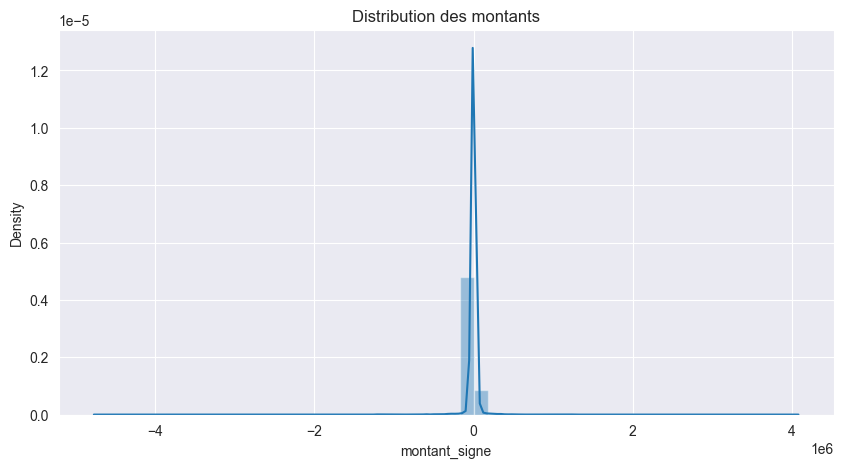

In [97]:
# tracons un graphe representant la distribution des montants

plt.figure(figsize=(10, 5))
sns.distplot(data['montant_signe'])
plt.title('Distribution des montants')
plt.show()

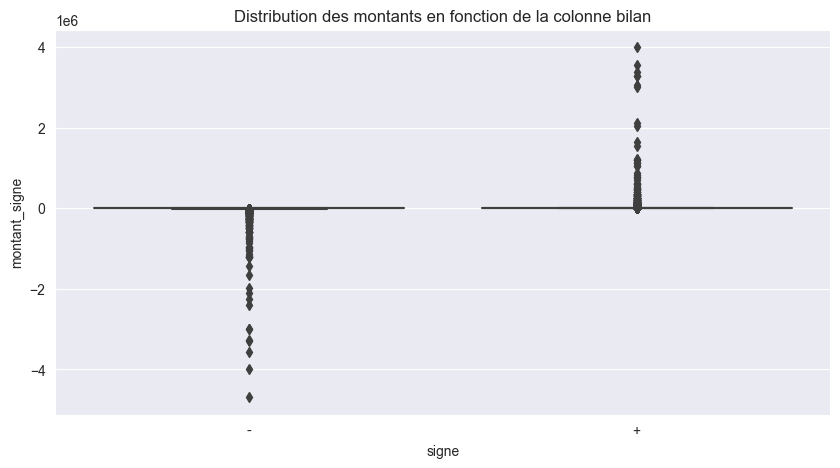

In [99]:
# On va afficher la distribution des montants en fonction de la colonne signe

plt.figure(figsize=(10, 5))
sns.boxplot(x='signe', y='montant_signe', data=data)
plt.title('Distribution des montants en fonction de la colonne bilan')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9456\4143222970.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[data['signe'] == '+', 'montant_signe'])


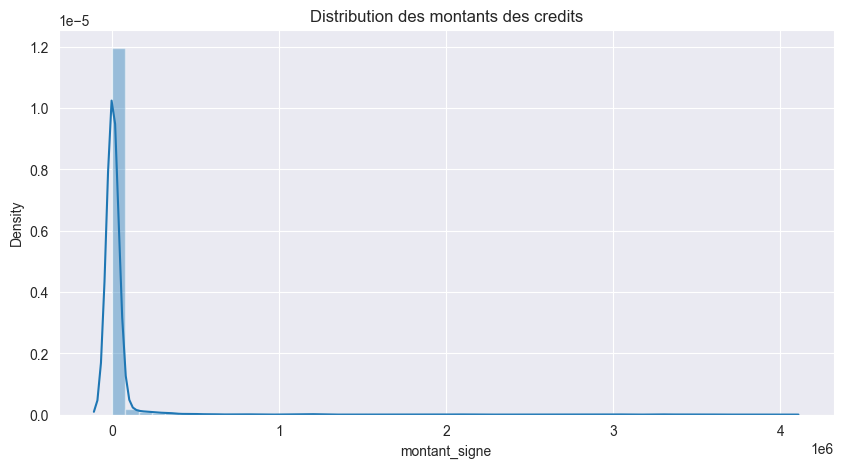

In [101]:
# tracons la distribution des montants en fonction de la colonne signe

plt.figure(figsize=(10, 5))
sns.distplot(data.loc[data['signe'] == '+', 'montant_signe'])
plt.title('Distribution des montants des credits')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9456\701152199.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[data['signe'] == '-', 'montant_signe'])


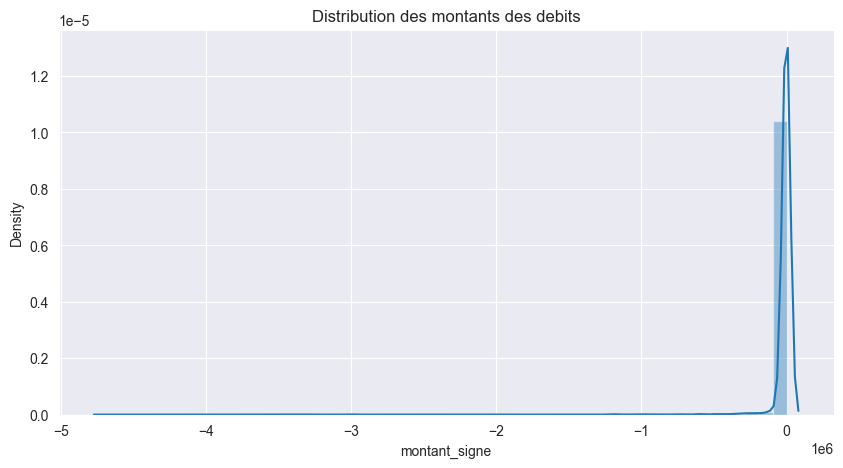

In [102]:
# tracons la distribution des montants en fonction de la colonne signe

plt.figure(figsize=(10, 5))
sns.distplot(data.loc[data['signe'] == '-', 'montant_signe'])
plt.title('Distribution des montants des debits')
plt.show()

Comme on peut le voir la majorite des transactions, que ce soit des debits ou des credits concernent de petites sommes

<Figure size 1000x500 with 0 Axes>

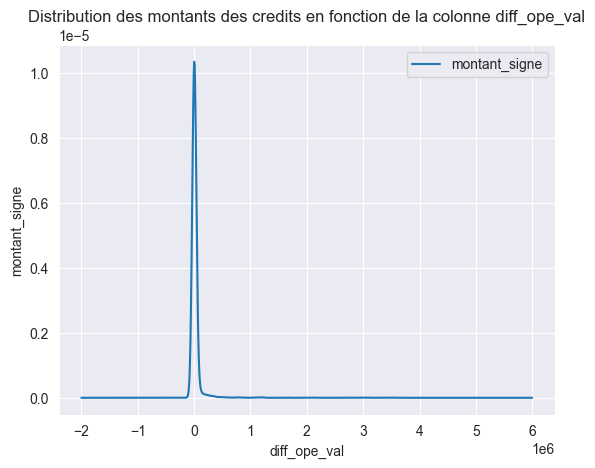

In [108]:
# On va afficher la distribution des densites montants des credits en fonction de la colonne diff_ope_val

plt.figure(figsize=(10, 5))

data.loc[data['signe'] == '+'].plot(kind='density', x='diff_ope_val', y='montant_signe')

# Ajouter des étiquettes pour les axes X et Y et un titre pour le graphique
plt.xlabel('diff_ope_val')
plt.ylabel('montant_signe')
plt.title('Distribution des montants des credits en fonction de la colonne diff_ope_val')

# Afficher le graphique
plt.show()

<Figure size 1000x500 with 0 Axes>

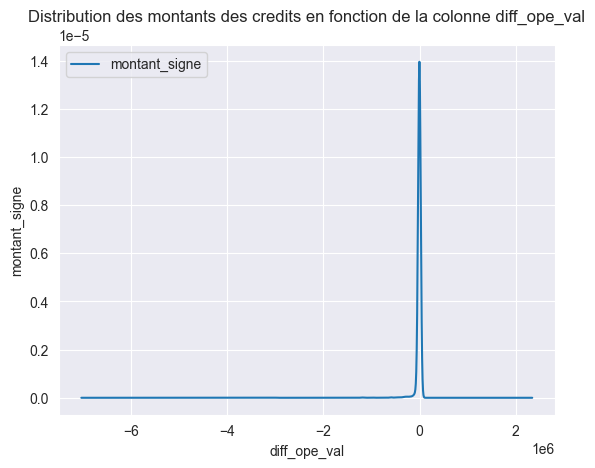

In [109]:
# On va afficher la distribution des densites montants des debits en fonction de la colonne diff_ope_val

plt.figure(figsize=(10, 5))

data.loc[data['signe'] == '-'].plot(kind='density', x='diff_ope_val', y='montant_signe')

# Ajouter des étiquettes pour les axes X et Y et un titre pour le graphique
plt.xlabel('diff_ope_val')
plt.ylabel('montant_signe')
plt.title('Distribution des montants des credits en fonction de la colonne diff_ope_val')

# Afficher le graphique
plt.show()

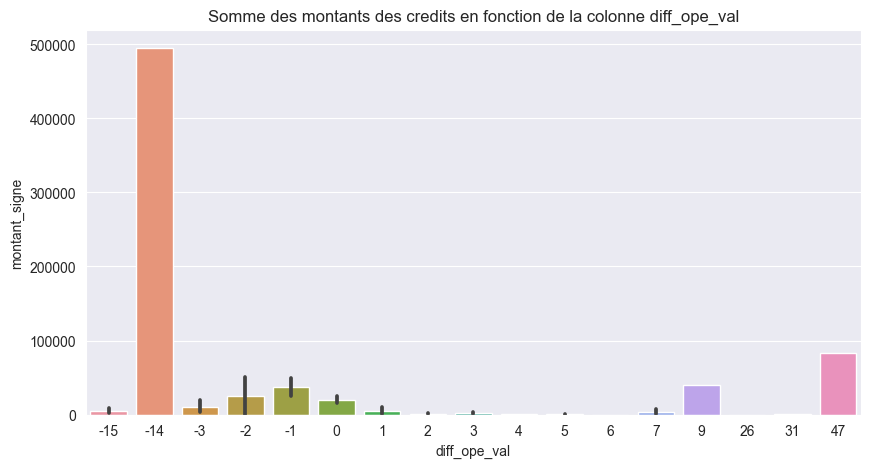

In [110]:
# tracons un histogramme de la somme des montants des credits en fonction de la colonne diff_ope_val

plt.figure(figsize=(10, 5))
sns.barplot(x='diff_ope_val', y='montant_signe', data=data.loc[data['signe'] == '+'])
plt.title('Somme des montants des credits en fonction de la colonne diff_ope_val')
plt.show()

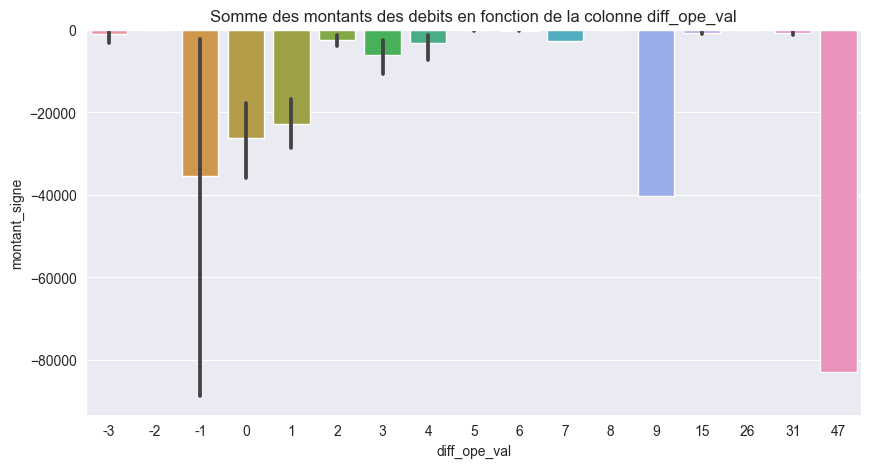

In [111]:
# tracons un histogramme de la somme des montants des debits en fonction de la colonne diff_ope_val

plt.figure(figsize=(10, 5))
sns.barplot(x='diff_ope_val', y='montant_signe', data=data.loc[data['signe'] == '-'])
plt.title('Somme des montants des debits en fonction de la colonne diff_ope_val')
plt.show()

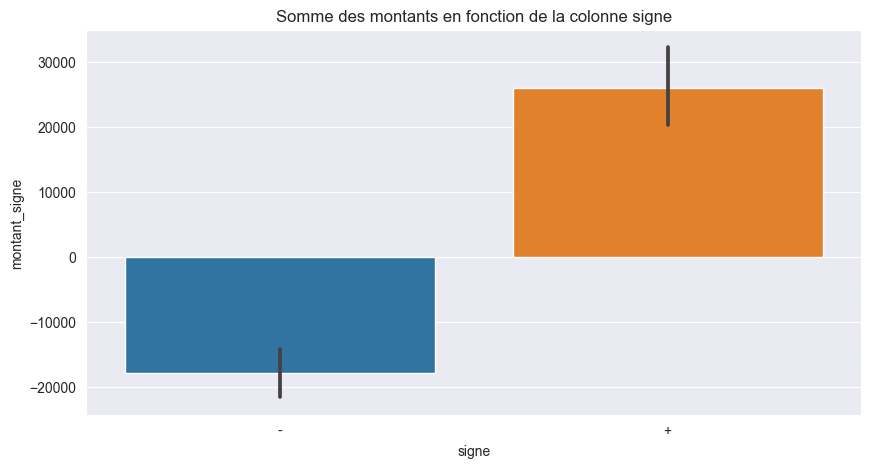

In [112]:
# tracons un histogramme de la somme des montants en fonction de signe

plt.figure(figsize=(10, 5))
sns.barplot(x='signe', y='montant_signe', data=data)
plt.title('Somme des montants en fonction de la colonne signe')
plt.show()

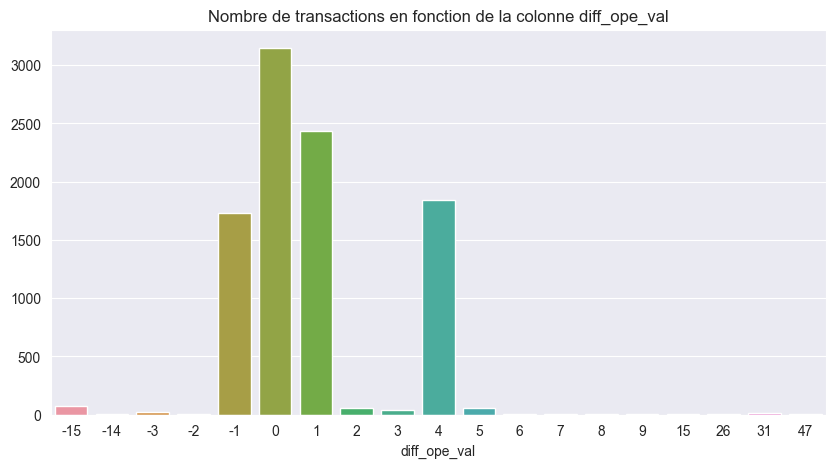

In [114]:
# faisons un plot des data['diff_ope_val'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=data['diff_ope_val'].value_counts().index, y=data['diff_ope_val'].value_counts().values)
plt.title('Nombre de transactions en fonction de la colonne diff_ope_val')
plt.show()

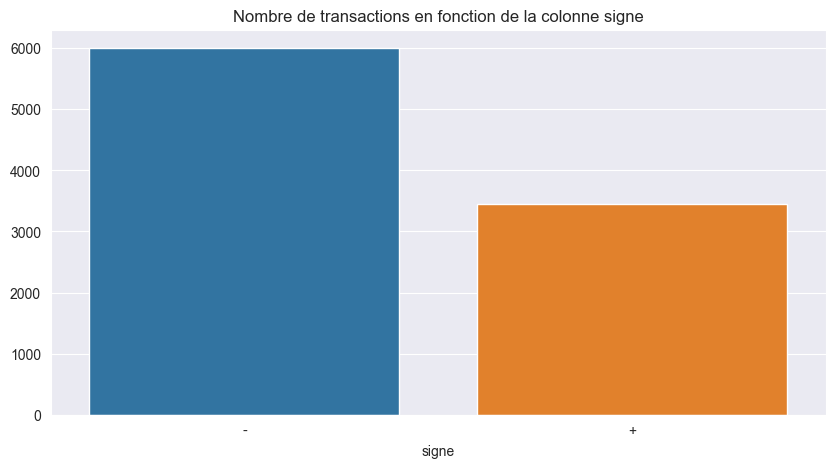

In [116]:
plt.figure(figsize=(10, 5))
sns.barplot(x=data['signe'].value_counts().index, y=data['signe'].value_counts().values)
plt.title('Nombre de transactions en fonction de la colonne signe')
plt.show()

Conclusion sur la colonne transaction :
Bien qu'on ait plus de debit que de credits, on peut voir que la somme des montants des credits est plus grande que celle des debits.
Au niveau des credit, on a des sommes plus importantes qui ont ete valides avec des dates de validations qui venaient apres la date operation ( Voir d'ou vient l'erreur de date), alors que le nombre de transactions concernees est tres faible par rapport a lorsque la duree est positive et proche de 0. On constate egalement qu'on a de grosses sommes quand la duree de validation est de -15 9 et 47 jours. Ainsi on peut supposer que les transactions de credits qui ont de gros montant prennent du temps a etre validees.
On observe egalement des conclusions plus ou moins similaires pour les debits.

In [180]:
# creer une colonne qui se chargera de creer les nouvelles colonnes

# On va creer un colonne qui represente la difference en nombre de jours entre la colonne dt_val et dt_ope

# On va creer une variable diff_ope_val_signe qui represente le signe de la difference de jours entre dt_ope et dt_val. En effet le fait que la date soit negative signifie que la date de validation a eu lieu avant la date d'operation ce qui n'est pas logique et pourrait etre une erreur lors de l'enredistrement des donnees ou une fraude potentielle


# A partir de la colonne numero_transactions, on va creer un colonne qui va a chaque fois que le numero de transaction se repete, s'incrementer de 1 si on est dans la meme date time. L'idee est que plus un numero de compte a de transactions plus cela pourrait representer quelque chose a observer.


def create_new_columns(data):
    data['diff_ope_val'] = (pd.to_datetime(data['dt_ope'], format='%Y-%m-%d', errors='coerce') - pd.to_datetime(data['dt_val'], format='%Y-%m-%d', errors='coerce')).dt.days
    data['diff_ope_val_signe'] = np.where(data['diff_ope_val'] < 0, '-', '+')
    data['transactions_counts'] = data.groupby(['numero_compte', 'dt_ope']).cumcount() + 1
    return data

#data = create_new_columns(data)

In [193]:
# Replace missing values in some coluns with unknown

def replace_missing_values_with_unknown(data):
    data['lib_etendu'].fillna('unknown', inplace=True)
    return data

In [ ]:
# Suppression des colonnes qui ont une enorme proportions de valeurs nulles

def drop_columns_with_many_null_values(data):
    data.drop(['cpt_anal', 'cd_user', 'cd_visa'], axis=1, inplace=True)
    return data

data = drop_columns_with_many_null_values(data)

In [ ]:
# Suppression des colonnes qui n'ont qu'une valeure unique

def drop_columns_with_unique_values(data):
    data.drop(['dt_ope', 'extourne', 'dt_compta', 'type_compta', 'dt_tresor', 'time'], axis=1, inplace=True)
    return data

data = drop_columns_with_unique_values(data)

In [ ]:
# On va supprimer les derniers colonnes qui n'apporterons pas de valeurs ajoutees aux predictions

def drop_useless_columns(data):
    data.drop(['dt_val', 'num_oper', 'numero_compte'], axis=1, inplace=True)
    return data

data = drop_useless_columns(data)

In [184]:
# supprimer les valeurs nulles

def drop_lines_with_null_values(data):
    data.dropna(inplace=True)
    return data

data = drop_lines_with_null_values(data)

On va creer une fonction qui va nous appliquer toutes les transformations precedentes a votre dataframe

In [194]:
def preprocess_data(data):
    data = drop_duplicates(data)
    data = create_new_columns(data)
    data = replace_missing_values_with_unknown(data)
    data = drop_columns_with_many_null_values(data)
    data = drop_columns_with_unique_values(data)
    data = drop_useless_columns(data)
    data = drop_lines_with_null_values(data)
    return data

data = preprocess_data(data)

In [195]:
data

,lib_etendu,bilan,montant_signe,signe,diff_ope_val,diff_ope_val_signe,transactions_counts
0,41ce64b36b9cfe92670dcdfa7ad4ca9b,21110,-99.00,-,4.0,+,1.0
1,fdbb71769ecf00d5778f657271bc9d9b,21110,-200.00,-,1.0,+,2.0
2,ce2bf864bfcd82b4bf01120c79d7ba46,21110,1900.00,+,-1.0,-,3.0
3,1fd98623f4623649bac0dd8c65ec49ce,21110,-1000.00,-,4.0,+,1.0
4,234f3006bad9b99df4e4d08556484dc9,21110,-2700.00,-,4.0,+,1.0
...,...,...,...,...,...,...,...
9995,8f2c23b5908d3bfddefbaa884fa763e2,21110,1200.00,+,-1.0,-,2.0
9996,f63c78b6318dce39f42161d6c56df3e5,21110,-1488.79,-,1.0,+,1.0
9997,f63c78b6318dce39f42161d6c56df3e5,21110,-1028.91,-,1.0,+,1.0
9998,cde473b0517a59e56d77ec3f7d7fe449,21110,-400.00,-,4.0,+,1.0


In [196]:
data.isnull().sum()

lib_etendu             0
bilan                  0
montant_signe          0
signe                  0
diff_ope_val           0
diff_ope_val_signe     0
transactions_counts    0
dtype: int64

In [197]:
# On va sauvegarder le dataframe dans un fichier csv

data.to_csv('Outputs/data.csv', index=False)